<a href="https://colab.research.google.com/github/rtaglega53/pedropicapiedra/blob/master/auregresion3_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconocimiento de Patrones
##Dr. Carlos Villaseñor
##Lección 3 - Regresión no lineal y autoregresión

## Regresión no lineal

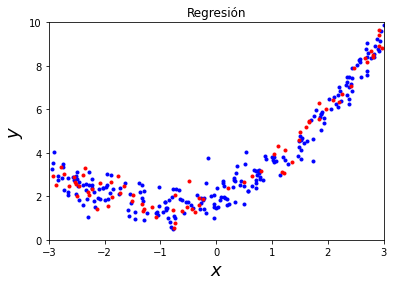

In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 300
r = 0.5
ruido = r* np.random.randn(m, 1)
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + ruido


xtrain, xtest, ytrain, ytest = train_test_split(x,y)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

K vecinos más cercanos

Train:  0.9633737973281776
Test:  0.9642878827542761


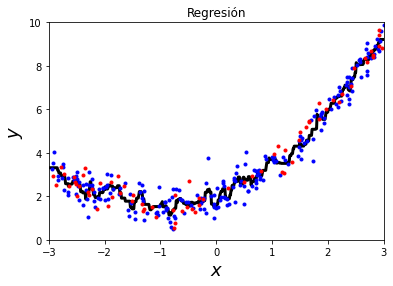

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5, weights = 'uniform')
model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Arboles de Desición


Train:  1.0
Test:  0.9389274945378348


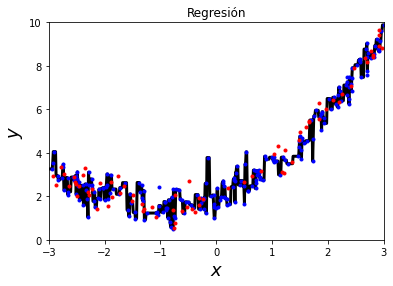

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=100)
model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Máquina de Soporte Vectorial

Train:  0.9541969014125329
Test:  0.9667922107451523


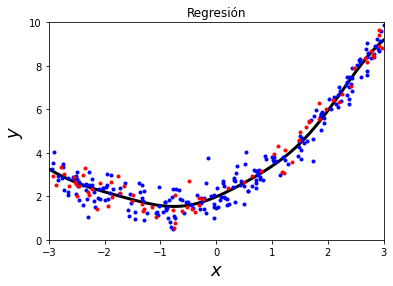

In [ ]:
from sklearn.svm import SVR

model = SVR(gamma='scale', C=10, epsilon=0.1, kernel='rbf')
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Kernel Ridge

Train:  0.9552385775592783
Test:  0.9659975625747272


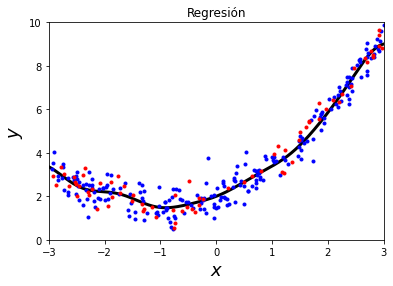

In [ ]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge(alpha=0.1, kernel= 'rbf')
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Proceso Gaussiano

Train:  0.9538908541541176
Test:  0.9626552911988783


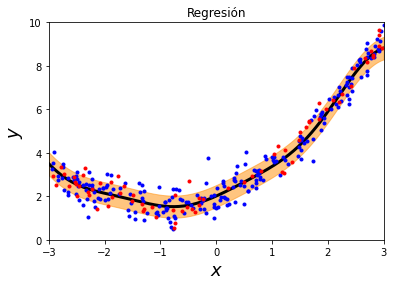

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) \
            + WhiteKernel(1e-1)
model = GaussianProcessRegressor(kernel=gp_kernel)

model.fit(xtrain,ytrain)


print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred, y_std = model.predict(x_new, return_std=True)
plt.plot(x_new, y_pred,'k-', linewidth=3)
plt.fill_between(x_new.ravel(), y_pred.ravel() - y_std.ravel(),
                 y_pred.ravel() + y_std.ravel(), color='darkorange',
                 alpha=0.5)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Perceptrón Multicapa

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train:  0.938663997228792
Test:  0.9524741508069572


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


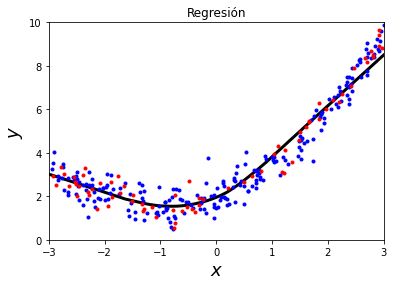

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
model.fit(xtrain,ytrain)


print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)


#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

## Autoregresión

Primeramente vamos a leer unos datos

In [5]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
uploaded = files.upload()

Saving 200930COVID19MEXICO.csv to 200930COVID19MEXICO (1).csv


        FECHA_ACTUALIZACION ID_REGISTRO  ...  PAIS_ORIGEN  UCI
0                2020-09-30      184062  ...           99    2
1                2020-09-30      1b0fcc  ...           99    2
2                2020-09-30      13cac9  ...           99   97
3                2020-09-30      071a7d  ...           99   97
4                2020-09-30      1007d8  ...           99   97
...                     ...         ...  ...          ...  ...
1706570          2020-09-30      376c21  ...           99   97
1706571          2020-09-30      428e57  ...           99   97
1706572          2020-09-30      29bbc3  ...           99   97
1706573          2020-09-30      282c12  ...           99   97
1706574          2020-09-30      1ee3a7  ...           99   97

[1706575 rows x 35 columns]
(696353,)
Counter({'2020-09-02': 16359, '2020-08-26': 16312, '2020-09-01': 16306, '2020-09-08': 15934, '2020-08-27': 15745, '2020-09-03': 15702, '2020-08-28': 15597, '2020-09-04': 15401, '2020-09-09': 15383, '2020-0

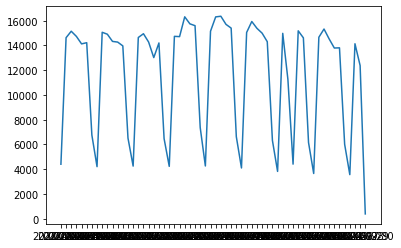

In [48]:
import collections
df = pd.read_csv('200930COVID19MEXICO.csv', encoding='windows-1252')
# labels = list(df.drop(columns=['id','date','price','zipcode']).columns)
# 
data = []
y = np.asanyarray(df['FECHA_INGRESO'])
print(df)
for element in y:
  if element > '2020-08-01':
    data.append(element)
y_filtered = np.asanyarray(data)
print(y_filtered.shape)
  
x = np.asanyarray([i for i in range(y_filtered.shape[0])])

print(collections.Counter(y_filtered))
diccionario = []
contador = []
print(diccionario)
for dia, value in collections.Counter(y_filtered).items():
  diccionario.append({'date':dia, 'cases':value})
  contador.append(value)
  # print(dia, value)
print(diccionario)
diccionario.sort(key = lambda x:x['date']) 
print(diccionario)
# print (dias)
print (contador)
# dias_a = np.asanyarray(dias)
# contador_a = np.asanyarray(contador)
print('si')
dias = []
contador = []
for element in diccionario:
  for key, value in element.items():
    if key == 'date':
      dias.append(value)
#      print(key, value)
    else:
      contador.append(value)
#      print(key, value)
print(dias)
print(contador)
plt.plot(dias, contador)

Veamos estos datos

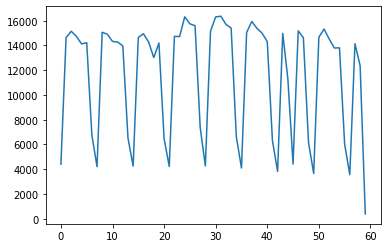

In [49]:

plt.plot(contador)

Vemos como se relaciona un dia con el anterior

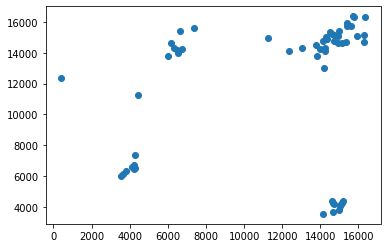

In [50]:
 plt.scatter(contador[1:], contador[:-1])

Calculemos la correlación


In [51]:
np.corrcoef(contador[1:], contador[:-1])

array([[1.        , 0.21993828],
       [0.21993828, 1.        ]])

Ahora bien podemos ver como se relaciona un día con otro solo cambiando el retardo

Podemos graficar estas correlaciones de la siguiente manera

In [95]:
df2 = pd.DataFrame({'contador':contador})
df3 = pd.DataFrame({'contador':contador})
print (df2)




    contador
0       4405
1      14626
2      15148
3      14731
4      14126
5      14222
6       6759
7       4207
8      15063
9      14907
10     14326
11     14271
12     13964
13      6518
14      4253
15     14642
16     14946
17     14274
18     13019
19     14201
20      6472
21      4232
22     14735
23     14713
24     16312
25     15745
26     15597
27      7369
28      4263
29     15150
30     16306
31     16359
32     15702
33     15401
34      6632
35      4102
36     15049
37     15934
38     15383
39     14993
40     14304
41      6324
42      3824
43     14978
44     11259
45      4411
46     15181
47     14614
48      6154
49      3656
50     14661
51     15327
52     14523
53     13792
54     13807
55      6015
56      3564
57     14136
58     12376
59       390


Vamos a preparar los datos

In [96]:

delay = 1
for i in range(1, delay+1):
  df2 = pd. concat([df2, df2.shift(-i)], axis=1)
df2= df2[:-delay]
print(df2)

    contador  contador
0       4405   14626.0
1      14626   15148.0
2      15148   14731.0
3      14731   14126.0
4      14126   14222.0
5      14222    6759.0
6       6759    4207.0
7       4207   15063.0
8      15063   14907.0
9      14907   14326.0
10     14326   14271.0
11     14271   13964.0
12     13964    6518.0
13      6518    4253.0
14      4253   14642.0
15     14642   14946.0
16     14946   14274.0
17     14274   13019.0
18     13019   14201.0
19     14201    6472.0
20      6472    4232.0
21      4232   14735.0
22     14735   14713.0
23     14713   16312.0
24     16312   15745.0
25     15745   15597.0
26     15597    7369.0
27      7369    4263.0
28      4263   15150.0
29     15150   16306.0
30     16306   16359.0
31     16359   15702.0
32     15702   15401.0
33     15401    6632.0
34      6632    4102.0
35      4102   15049.0
36     15049   15934.0
37     15934   15383.0
38     15383   14993.0
39     14993   14304.0
40     14304    6324.0
41      6324    3824.0
42      382

Seleccionemos nuestros datos

In [97]:
df2 =df2.iloc[:56,]
x = np.asanyarray(df2.iloc[:,:-1])
y = np.asanyarray(df2.iloc[:,-1])
print(x)
print(y)

[[ 4405]
 [14626]
 [15148]
 [14731]
 [14126]
 [14222]
 [ 6759]
 [ 4207]
 [15063]
 [14907]
 [14326]
 [14271]
 [13964]
 [ 6518]
 [ 4253]
 [14642]
 [14946]
 [14274]
 [13019]
 [14201]
 [ 6472]
 [ 4232]
 [14735]
 [14713]
 [16312]
 [15745]
 [15597]
 [ 7369]
 [ 4263]
 [15150]
 [16306]
 [16359]
 [15702]
 [15401]
 [ 6632]
 [ 4102]
 [15049]
 [15934]
 [15383]
 [14993]
 [14304]
 [ 6324]
 [ 3824]
 [14978]
 [11259]
 [ 4411]
 [15181]
 [14614]
 [ 6154]
 [ 3656]
 [14661]
 [15327]
 [14523]
 [13792]
 [13807]
 [ 6015]]
[14626. 15148. 14731. 14126. 14222.  6759.  4207. 15063. 14907. 14326.
 14271. 13964.  6518.  4253. 14642. 14946. 14274. 13019. 14201.  6472.
  4232. 14735. 14713. 16312. 15745. 15597.  7369.  4263. 15150. 16306.
 16359. 15702. 15401.  6632.  4102. 15049. 15934. 15383. 14993. 14304.
  6324.  3824. 14978. 11259.  4411. 15181. 14614.  6154.  3656. 14661.
 15327. 14523. 13792. 13807.  6015.  3564.]


Ahora vamos a construir y probar el modelo

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xtrain, xtest, ytrain, ytest = train_test_split(x,y)

model = LinearRegression()

model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

Train:  0.04988901518639277
Test:  0.0922340773192214


Predicción 


In [100]:

last_days = (df3[-delay:].values).reshape(1,-1)
print(last_days)

pred = model.predict(last_days)
print('Prediccion de contagios', pred)

[[390]]
Prediccion de contagios [9084.5641329]
